In [37]:
import numpy as np
import pandas as pd
import statsmodels as sm

In [38]:
df = pd.read_csv('ADANIENT.NS (1).csv', parse_dates=True, index_col='Date')


In [39]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-18,41.058308,43.101688,41.058308,42.475052,41.152264,16642761
2015-09-21,41.848415,45.199554,41.466984,44.218735,42.841637,10205902
2015-09-22,44.518429,45.771702,42.257092,42.720257,41.389832,7453139
2015-09-23,41.439739,44.136997,41.412495,43.592098,42.234520,7308058
2015-09-24,43.592098,44.273224,42.774746,43.755569,42.392895,6136409


<AxesSubplot:xlabel='Date'>

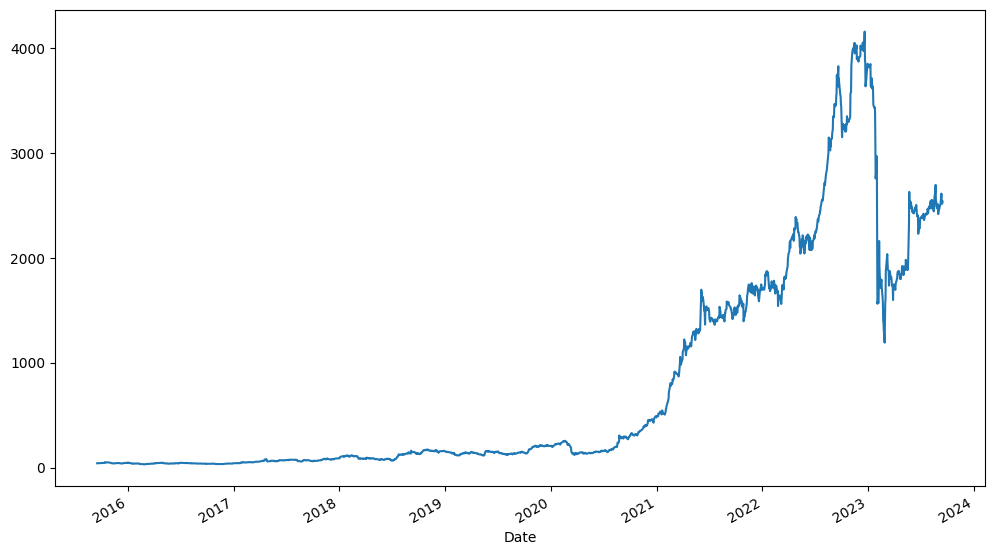

In [40]:
df['Adj Close'].plot(figsize=(12, 7))

In [41]:
df.dropna(inplace=True)

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
adftest = adfuller(df['Adj Close'], autolag='AIC')

In [44]:
adftest

(-0.7947362508778293,
 0.8206633662731675,
 26,
 1947,
 {'1%': -3.4337130931808058,
  '5%': -2.86302561129431,
  '10%': -2.5675608796776626},
 20215.447650000977)

In [33]:
def test_stats(df, var):
    df['rollmean'] = df[var].rolling(window=12).mean()
    df['rollstd'] = df[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adftest = adfuller(df[var], autolag='AIC')
    stats = pd.Series(adftest[0:4], index=['Test Stats', 'p-value', '#lags used', 'no_of_observations'])
    return stats

In [34]:
test_stats(df, 'Adj Close')

Test Stats              -0.794736
p-value                  0.820663
#lags used              26.000000
no_of_observations    1947.000000
dtype: float64

In [35]:
df['AdjClosedDiff'] = df['Adj Close'].shift(1)

In [36]:
test_stats(df.dropna(), 'AdjClosedDiff')

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_300\3463493031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollmean'] = df[var].rolling(window=12).mean()
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_300\3463493031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollstd'] = df[var].rolling(window=12).std()


Test Stats              -0.835637
p-value                  0.808429
#lags used              26.000000
no_of_observations    1936.000000
dtype: float64